## Segmenting and Clustering Neighborhoods in Toronto

#### This notebook will be used for the analysis of the different neighborhoods in the Toronto area as part of the Coursera IBM Data Science Capstone Project

In [3]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from bs4 import BeautifulSoup # webscraping and parser library
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## The webpage contains tables.  Using the below commands, the information can be navigated and parsed correctly.
## It lists 103 cells pertaining to the FSAs (Forward Sortation Areas) or Postal Codes in Toronto.

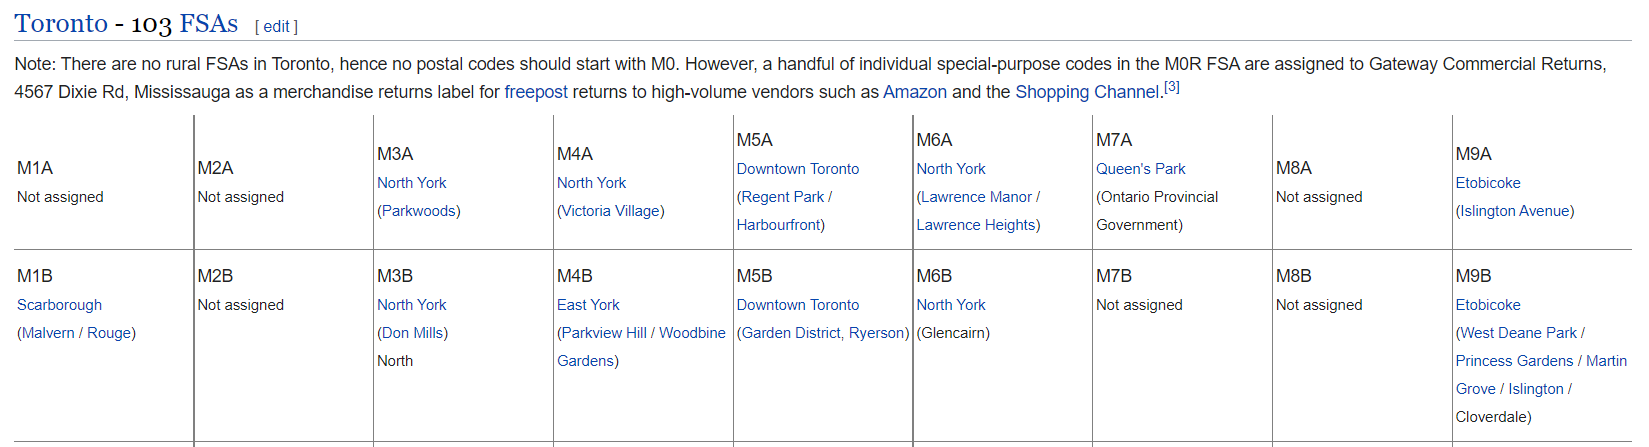

## Now to setup the notebook to locate and extract the information

In [57]:
# Using Requests and BeautifulSoup library to extract and format the data
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' # website containing the information to use
data  = requests.get(url).text # webscrape the data and format as text
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data' html doctype
# print(soup.prettify)  # displays the content in text document

In [58]:
# find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [59]:
# number of tables found by checking the length of the tables list
len(tables)

3

In [60]:
# print(tables[table_index].prettify()) # breaks the table down into a html hierarchy.  Each FSA begins with a 'M' and there are no 'M0'

## Extracting and formating the data using Pandas.

In [61]:
# Creating a data frame 'cell' which will break the data for Toronto into three columns.

cell = ['Postal Code', 'Borough', 'Neighborhood']

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'): # locates a data cell within a table
    cell = {}
    if row.span.text=='Not assigned':  # skips over empty cells
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [62]:
df.head() # Display first five rows.

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [63]:
df.shape # Size (rows) in our data table.

(103, 3)

## So far the information has been extracted from Wikipedia, reviewed and parsed, and placed into a data frame.  Using df.shape and len() our data frame is (103, 3) which means we have the correct amount of data.